# Imports

In [1]:
# Basics
import numpy as np
import pandas as pd
import os
import scipy.stats as stats
from pydataset import data
from scipy import math
import requests
import datetime

# Visuals
import seaborn as sns

# Custom
import wrangle
from vega_datasets import data

In [2]:
df = data.sf_temps()
df.head()

,temp,date
0,47.8,2010-01-01 00:00:00
1,47.4,2010-01-01 01:00:00
2,46.9,2010-01-01 02:00:00
3,46.5,2010-01-01 03:00:00
4,46.0,2010-01-01 04:00:00


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8759 entries, 0 to 8758
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   temp    8759 non-null   float64       
 1   date    8759 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 137.0 KB


In [4]:
# set 'date' as the index
# get affairs in the right order
df = df.set_index('date').sort_index()

In [5]:
df.head()

,temp
date,
2010-01-01 00:00:00,47.8
2010-01-01 01:00:00,47.4
2010-01-01 02:00:00,46.9
2010-01-01 03:00:00,46.5
2010-01-01 04:00:00,46.0


## Exercise 1
   - Resample by the day and take the average temperature. Visualize the average temperature over time.
   


<AxesSubplot:xlabel='date'>

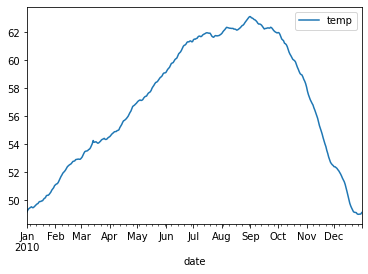

In [6]:
df.resample('D').mean().plot()

## Exercise 2
- Write the code necessary to visualize the minimum temperature over time.

<AxesSubplot:xlabel='date'>

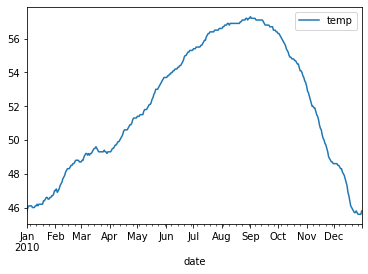

In [7]:
df.resample('D').min().plot()

## Exercise 3
- Write the code necessary to visualize the maximum temperature over time.

<AxesSubplot:xlabel='date'>

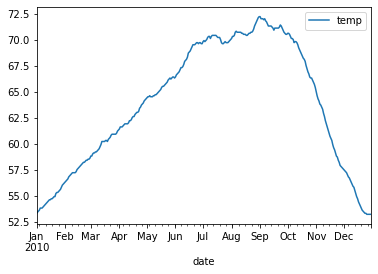

In [8]:
df.resample('D').max().plot()

## Exercise 4 & 5
- Which month is the coldest, on average?
- Which month has the highest average temperature?

In [9]:
df.resample('M').mean().temp.sort_values()

date
2010-01-31    49.984140
2010-12-31    50.498253
2010-02-28    52.243899
2010-03-31    53.956528
2010-11-30    55.185139
2010-04-30    55.633056
2010-05-31    57.970968
2010-10-31    60.253091
2010-06-30    60.444722
2010-07-31    61.765457
2010-08-31    62.405376
2010-09-30    62.487083
Name: temp, dtype: float64

In [10]:
# The coldest month on average was January
# The hottest month on average was September

## Exercise 6
   - Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?


In [11]:
daily = df.temp.resample('D').agg(['min', 'max'])
daily.head()

,min,max
date,,
2010-01-01,45.8,53.3
2010-01-02,46.0,53.4
2010-01-03,46.1,53.5
2010-01-04,46.1,53.6
2010-01-05,46.1,53.8


In [12]:
# make new column showing change in temp over day
daily['varience'] = daily['max'] - daily['min']
daily.head()

,min,max,varience
date,,,
2010-01-01,45.8,53.3,7.5
2010-01-02,46.0,53.4,7.4
2010-01-03,46.1,53.5,7.4
2010-01-04,46.1,53.6,7.5
2010-01-05,46.1,53.8,7.7


In [13]:
daily.resample('M').max().varience.sort_values()

date
2010-12-31     8.9
2010-01-31     9.3
2010-02-28     9.9
2010-11-30    11.8
2010-03-31    12.0
2010-04-30    13.0
2010-05-31    13.1
2010-10-31    14.4
2010-06-30    14.8
2010-07-31    14.8
2010-09-30    14.9
2010-08-31    15.0
Name: varience, dtype: float64

In [14]:
# August had the widest margin in temp in one day

## Bonus
   - Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines.

<AxesSubplot:xlabel='date'>

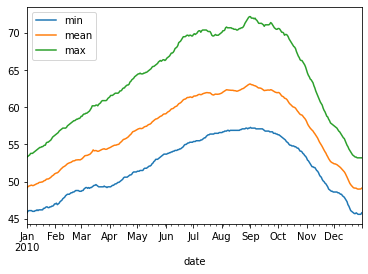

In [15]:
# use the .agg() from last question
df.temp.resample('D').agg(['min', 'mean', 'max']).plot()

# Seatle Weather

In [16]:
from vega_datasets import data
df = data.seattle_weather()
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [17]:
df = df.set_index('date').sort_index()
df.head()

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle
2012-01-02,10.9,10.6,2.8,4.5,rain
2012-01-03,0.8,11.7,7.2,2.3,rain
2012-01-04,20.3,12.2,5.6,4.7,rain
2012-01-05,1.3,8.9,2.8,6.1,rain


## Question 1
   - Which year and month combination has the highest amount of precipitation?


In [18]:
df.resample('M').sum().precipitation.sort_values(ascending=False).head()

date
2015-12-31    284.5
2014-03-31    240.0
2015-11-30    212.6
2012-11-30    210.5
2012-03-31    183.0
Name: precipitation, dtype: float64

In [19]:
# December of 2015 had the most precipitation

## Question 2
   - Visualize the amount of monthly precipitation over time.


<AxesSubplot:xlabel='date'>

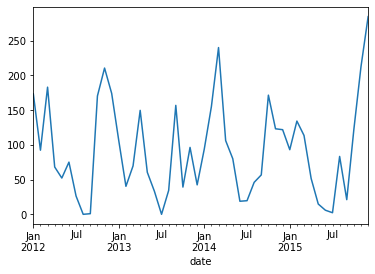

In [20]:
# Montly Precipitation
df.precipitation.resample('M').sum().plot()

## Question 3
   - Visualize the amount of wind over time. Choose a time interval you think is appropriate.

In [21]:
df.head(10)

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle
2012-01-02,10.9,10.6,2.8,4.5,rain
2012-01-03,0.8,11.7,7.2,2.3,rain
2012-01-04,20.3,12.2,5.6,4.7,rain
2012-01-05,1.3,8.9,2.8,6.1,rain
2012-01-06,2.5,4.4,2.2,2.2,rain
2012-01-07,0.0,7.2,2.8,2.3,rain
2012-01-08,0.0,10.0,2.8,2.0,sun
2012-01-09,4.3,9.4,5.0,3.4,rain


<AxesSubplot:xlabel='date'>

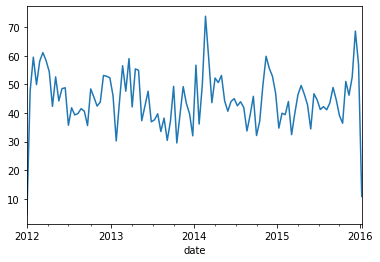

In [22]:
# gonna visualize by biweekly intervals
df.wind.resample('2W').sum().plot()

## Question 4
   - Which year-month combination is the windiest?


In [23]:
# Can use
df.resample('M').sum().wind.sort_values(ascending=False).head()

date
2015-12-31    134.6
2012-03-31    131.7
2014-02-28    126.8
2012-01-31    120.9
2014-11-30    119.5
Name: wind, dtype: float64

In [24]:
# Once again it seems that December of 2015 was the windiest month

## Question 5
   - What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)


In [25]:
df.weather.value_counts()

sun        714
fog        411
rain       259
drizzle     54
snow        23
Name: weather, dtype: int64

In [26]:
df['sunny_day'] = df.weather == 'sun'

In [27]:
df.head()

,precipitation,temp_max,temp_min,wind,weather,sunny_day
date,,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle,False
2012-01-02,10.9,10.6,2.8,4.5,rain,False
2012-01-03,0.8,11.7,7.2,2.3,rain,False
2012-01-04,20.3,12.2,5.6,4.7,rain,False
2012-01-05,1.3,8.9,2.8,6.1,rain,False


In [28]:
df.resample('Y').sunny_day.mean()

date
2012-12-31    0.322404
2013-12-31    0.561644
2014-12-31    0.578082
2015-12-31    0.493151
Freq: A-DEC, Name: sunny_day, dtype: float64

In [29]:
# Based on the data, 2014 was the Sunniest Year 

## Question 6
   - In which month does it rain the most?


In [30]:
df.resample('M').precipitation.mean().sort_values().tail(10)

date
2012-10-31    5.493548
2014-10-31    5.532258
2014-02-28    5.542857
2012-01-31    5.590323
2012-12-31    5.612903
2012-03-31    5.903226
2012-11-30    7.016667
2015-11-30    7.086667
2014-03-31    7.741935
2015-12-31    9.177419
Name: precipitation, dtype: float64

In [31]:
df.weather.value_counts()

sun        714
fog        411
rain       259
drizzle     54
snow        23
Name: weather, dtype: int64

In [32]:
rain_df = df[df.weather == 'rain']
rain_df.shape

(259, 6)

In [33]:
rain_df.head()

,precipitation,temp_max,temp_min,wind,weather,sunny_day
date,,,,,,
2012-01-02,10.9,10.6,2.8,4.5,rain,False
2012-01-03,0.8,11.7,7.2,2.3,rain,False
2012-01-04,20.3,12.2,5.6,4.7,rain,False
2012-01-05,1.3,8.9,2.8,6.1,rain,False
2012-01-06,2.5,4.4,2.2,2.2,rain,False


In [34]:
rain_df.resample('M').precipitation.sum().sort_values().tail()

date
2013-01-31    105.4
2012-12-31    115.6
2012-03-31    120.5
2012-10-31    170.3
2012-11-30    210.5
Name: precipitation, dtype: float64

In [35]:
# It rained the most in November of 2012

## Question 7
   - Which month has the most number of days with a non-zero amount of precipitation?

In [36]:
df['rainy_day'] = df.precipitation > 0
df.head()

,precipitation,temp_max,temp_min,wind,weather,sunny_day,rainy_day
date,,,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle,False,False
2012-01-02,10.9,10.6,2.8,4.5,rain,False,True
2012-01-03,0.8,11.7,7.2,2.3,rain,False,True
2012-01-04,20.3,12.2,5.6,4.7,rain,False,True
2012-01-05,1.3,8.9,2.8,6.1,rain,False,True


In [37]:
df.resample('M').rainy_day.mean().sort_values().tail()

date
2014-02-28    0.678571
2012-01-31    0.709677
2012-03-31    0.709677
2015-12-31    0.806452
2012-12-31    0.870968
Name: rainy_day, dtype: float64

In [38]:
# December of 2012 had the most days with rain

# Flight Data

In [39]:
df = data.flights_20k()
df.head()

,date,delay,distance,origin,destination
0,2001-01-13 14:56:00,32,417,SAN,SJC
1,2001-01-31 16:40:00,-5,1093,FLL,ISP
2,2001-02-11 18:39:00,3,293,LBB,DAL
3,2001-01-10 21:00:00,-15,550,MSY,MCO
4,2001-03-30 21:45:00,-2,229,STL,IND


In [40]:
df = df.set_index('date').sort_index()
df.head()

,delay,distance,origin,destination
date,,,,
2001-01-01 00:01:00,14,405,MCI,MDW
2001-01-01 06:20:00,0,491,BNA,MCI
2001-01-01 06:30:00,-8,251,MDW,STL
2001-01-01 07:00:00,-10,361,OAK,ONT
2001-01-01 07:00:00,0,303,MSY,HOU


## Question 1
- Convert any negative delays to 0.

In [41]:
df.delay

date
2001-01-01 00:01:00    14
2001-01-01 06:20:00     0
2001-01-01 06:30:00    -8
2001-01-01 07:00:00   -10
2001-01-01 07:00:00     0
                       ..
2001-03-31 21:02:00    26
2001-03-31 21:05:00    -5
2001-03-31 21:05:00    -1
2001-03-31 21:30:00    30
2001-03-31 21:30:00   -11
Name: delay, Length: 20000, dtype: int64

In [42]:
def negative_to_zero(x):
    if x < 0:
        x = 0
    return x

In [46]:
df['delay'] = df.delay.apply(negative_to_zero)

In [47]:
df.head()

,delay,distance,origin,destination
date,,,,
2001-01-01 00:01:00,14,405,MCI,MDW
2001-01-01 06:20:00,0,491,BNA,MCI
2001-01-01 06:30:00,0,251,MDW,STL
2001-01-01 07:00:00,0,361,OAK,ONT
2001-01-01 07:00:00,0,303,MSY,HOU


## Question 2
- Which hour of the day has the highest average delay?

In [48]:
df['hour'] = df.index.hour

In [50]:
df.groupby('hour').delay.mean().sort_values(ascending=False).head()

hour
3     302.500000
1     170.000000
0     127.916667
23     65.353846
22     32.704607
Name: delay, dtype: float64

In [ ]:
# The 3rd hour of the day will typically have the higest rate of delay

## Question 3
- Does the day of the week make a difference in the delay amount?

In [54]:
df['day'] = df.index.day_name()
df['day'].value_counts()

Wednesday    3079
Friday       3028
Thursday     3011
Monday       2980
Tuesday      2945
Sunday       2614
Saturday     2343
Name: day, dtype: int64

In [57]:
df.groupby('day').delay.mean().sort_values()

day
Monday        7.165772
Saturday      8.431498
Tuesday       9.410866
Sunday       10.413542
Wednesday    11.032478
Thursday     12.821322
Friday       17.757596
Name: delay, dtype: float64

## Question 4
- Does the month make a difference in the delay amount?